<a href="https://colab.research.google.com/github/GabyLeon10100/MujeresDigitales/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de los clientes en una cadena de supermercados

In [129]:
# Inslamos una actualización de plotly
pip install --user --upgrade plotly 

In [132]:
#Importamos las librerias necesarias para el proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt
import random
import matplotlib.colors as mcolors

**INTRODUCCIÓN**

---
**Contexto empresarial:** Una cadena de supermercados desea saber que segmento de clientes es más probable que compre cierto producto y solo comercializarlo en ese segmento en particular. Para ello requiere comprender mejor las necesidades, comportamientos y preocupaciones de los diferentes tipos de clientes.

**Problema empresarial:** Analizar los datos proporcionados y proporcionar estadisticas para la creacion correcta de la campaña. Brindando visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico:** Se proporciona un archivo CSV que contiene detalles sobre cada cliente como fecha de nacimiento,ingresos, ubicación geografica del cliente, número de compras realizadas a través del sitio web de la empresa, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

* Leer, transformar y preparar datos para su visualización

* Realizar análisis y construir visualizaciones de los datos para identificar patrones

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

Tenemos las siguientes columnas:

*   **ID**= Identificacion unica del cliente.
*   **Year_Birth**= Año de nacimiento del cliente.
*   **Marital_Status**= Estado civil.
*   **Income**= Ingreso familiar anual del cliente.
*   **Kidhome**= Número de niños en el hogar del cliente.
*   **Teenhome**= Número de adolescentes en el hogar del cliente
*   **Dt_Customer**= Fecha de inscripción del cliente en la empresa.
*   **Recency**= Número de días desde la última compra del cliente
*   **MntWines**= Cantidad gastada en vino en los últimos 2 años
*   **MntFruits**= Cantidad gastada en frutas en los últimos 2 años
*   **MntMeatProducts**= Cantidad gastada en carne en los últimos 2 años
*   **MntFishProducts**= Cantidad gastada en pescado en los últimos 2 años
*   MntSweetProducts= Cantidad gastada en dulces en los últimos 2 años
*   **MntGoldProds**=Cantidad gastada en oro en los últimos 2 años
*   **NumDealsPurchases**= Número de compras realizadas con descuento
*   **NumWebPurchases**= Número de compras realizadas a través del sitio web de la empresa
*   **NumCatalogPurchases**= Número de compras realizadas mediante catálogo
*   **NumStorePurchases**=Número de compras realizadas directamente en tiendas
*   **NumWebVisitsMonth**= Número de visitas al sitio web de la empresa en el último mes
*   **AcceptedCmp3**=1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario
*   **AcceptedCmp4**= 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario
*   **AcceptedCmp5**=1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario
*   **AcceptedCmp1**=1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario
*   **AcceptedCmp2**=1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario
*   **Response**= 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario
*   **Complain**= 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario
*   **Country**= Ubicación del cliente


## Analizado los datos - columnas


In [133]:
#Asigmos un DataFrame con el nombre data, con los datos de la tienda
data=pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [134]:
#Obtenemos la cantidad de registros por columna y tipo de dato
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [135]:
data.shape #cantidad de registros y de columnas.

(2240, 28)

In [136]:
data.columns = data.columns.str.replace(' ', '',regex=True) #Reemplazar en las columnas los dos espacios por vacio.
data['Income'] = data['Income'].str.replace('$', '',regex=True)#Reemplazar en la columna Income el signo peso por vacio.
data['Income'] = data['Income'].str.replace(',','').astype('float')#Reemplazar en la columna Income la coma de los registros por vacio y convertirlos a tipo float.

In [137]:
#Buscamos si hay campos nulos en alguno de los campos que tenemos en los datos
data.isnull().sum().sort_values(ascending=False)#Sustituir valores nulos por True si es nulo o False si no lo es y sumarlos. Ordenar de mayor cantidad a menor.

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

In [138]:
data['Income']=data['Income'].fillna(data['Income'].median())#Sustituye en la columna Income los valores nulos por el valor mediano para evitar 
#el efecto de valores atipico
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


# Parte 1: ¿Como ha flutuado el número de compras durante los ultimos dos años? ¿Han aumentado con el tiempo? ¿Cual es el producto más comprado?

En esta parte, vamos a identificar como ha sido las compras a lo largo de los dos años, por medio de las compras online, directamente con la tienda y como se comporta en los diferentes países donde tiene comercio la tienda.


In [139]:
#Vamos a identificar cuanto(cantidad) ha vendido la tienda en los diferentes productos
cantidad_vino = data['MntWines'].sum() #Cantidad de vino
cantidad_fruta = data['MntFruits'].sum() #Cantidad de frutas
cantidad_carne = data['MntMeatProducts'].sum() #Cantidad de carne
cantidad_pescado = data['MntFishProducts'].sum() #Cantidad de pescado
cantidad_dulces = data['MntSweetProducts'].sum() #Cantidad de dulces
cantidad_oro = data['MntGoldProds'].sum() #Cantidad de oro

In [140]:
#Creamos el DataFrame
valores = pd.DataFrame()

#Asignamos las columnas del DataFrame
valores['productos'] = None
valores['cantidad'] = None

#Creamos campos, para llenar el DataFrame
productos = ['Vino', 'Fruta', 'Carne', 'Pescado', 'Dulce', 'Oro']
cantidad = [cantidad_vino, cantidad_fruta, cantidad_carne, cantidad_pescado, cantidad_dulces, cantidad_oro]

#Llenamos el DataFrame
valores['productos'] = productos
valores['cantidad'] = cantidad
valores

,productos,cantidad
0,Vino,680816
1,Fruta,58917
2,Carne,373968
3,Pescado,84057
4,Dulce,60621
5,Oro,98609


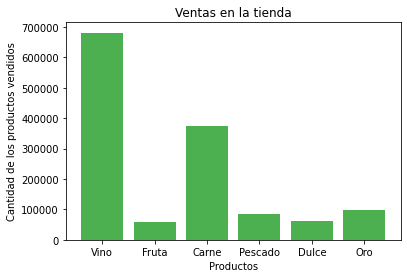

In [141]:
#Creamos la grafica de barras sobre la compra de los productos
valores = valores[["productos", "cantidad"]]
x = valores.productos
y = valores.cantidad
plt.bar(x, y, color = "#4CAF50")
plt.title("Ventas en la tienda")
plt.xlabel("Productos")
plt.ylabel("Cantidad de los productos vendidos")
plt.show()

En la grafica podemos apreciar que el producto que más se vende en la tienda es el Vino y la menos apreciada por los clientes es la fruta y dulce, que tienen valores muy bajos



In [142]:
#Sacamos el total de compras
purchases_col=[col for col in data.columns if 'Purchase' in col]#variable para las columnas que contienen la palabra 'Purchase' sumar aplicado en forma de filas.
data['TotalPurchases']=data[purchases_col].sum(axis=1)

In [143]:
#Identificamos los países donde se ofrecen los productos
data['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [144]:
#Agregamos una nueva columna a nuestro DataFrame con los nombres de los países
data['paises'] = data['Country'] #Asignamos los mismos valores que el campo Country para que la modificacion de los datos sea mas rapida
data['codigo'] = data['Country']

data['paises'] = data['Country'].replace({'SP': 'ESPAÑA', 'CA': 'CANADA', 'US': 'ESTADOS UNIDOS', 'AUS': 'AUSTRALIA', 'GER': 'ALEMANIA', 'IND': 'INDIA', 'SA': 'SUDAFRICA', 'ME': 'MEXICO', })
data['codigo'] = data['Country'].replace({'SP': '1', 'CA': '2', 'US': '3', 'AUS': '4', 'GER': '5', 'IND': '6', 'SA': '7', 'ME': '8'})
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalPurchases,paises,codigo
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,15,ESPAÑA,1
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,18,CANADA,2
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,11,ESTADOS UNIDOS,3
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,4,AUSTRALIA,4
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,8,ESPAÑA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,20,ESTADOS UNIDOS,3
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,5,ESPAÑA,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,14,ESPAÑA,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,20,INDIA,6


In [145]:
#Para la columna Country le cambiamos los codigos, a un codigo general de los países
data['Code_country'] = data['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalPurchases,paises,codigo,Code_country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,15,ESPAÑA,1,ESP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,18,CANADA,2,CAN
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,11,ESTADOS UNIDOS,3,USA
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,4,AUSTRALIA,4,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,8,ESPAÑA,1,ESP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,20,ESTADOS UNIDOS,3,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,5,ESPAÑA,1,ESP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,14,ESPAÑA,1,ESP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,20,INDIA,6,IND


In [162]:
#Agrupamos por los paises, pero tambien por el producto que se desea saber la cantidad de compras
vino = data.groupby('paises').MntWines.sum()
fruta = data.groupby('paises').MntFruits.sum()
carne = data.groupby('paises').MntMeatProducts.sum()
pescado = data.groupby('paises').MntFishProducts.sum()
dulce = data.groupby('paises').MntSweetProducts.sum()
oro = data.groupby('paises').MntGoldProds.sum()

In [163]:
#Llenamos el DataFrame compra por los valores de los paises con los diferentes valores de las compras
compra = pd.DataFrame()
compra['paises'] = ["ALEMANIA", "AUSTRALIA", "CANADA", "ESPAÑA", "EEUU", "INDIA", "MEXICO", "SUDAFRICA"]
compra['Wine'] = [vino[0], vino[1], vino[2], vino[3], vino[4], vino[5], vino[6], vino[7]]
compra['Fruit'] = [fruta[0], fruta[1], fruta[2], fruta[3], fruta[4], fruta[5], fruta[6], fruta[7]]
compra['Meat'] = [carne[0], carne[1], carne[2], carne[3], carne[4], carne[5], carne[6], carne[7]]
compra['Fish'] = [pescado[0], pescado[1], pescado[2], pescado[3], pescado[4], pescado[5], pescado[6], pescado[7]]
compra['Sweet'] = [dulce[0], dulce[1], dulce[2], dulce[3], dulce[4], dulce[5], dulce[6], dulce[7]]
compra['Gold'] = [oro[0], oro[1], oro[2], oro[3], oro[4], oro[5], oro[6], oro[7]]
compra

,paises,Wine,Fruit,Meat,Fish,Sweet,Gold
0,ALEMANIA,37483,3062,20874,4767,2870,5857
1,AUSTRALIA,44372,3884,23097,5834,4608,7968
2,CANADA,84649,7746,46148,10028,7678,12283
3,ESPAÑA,337236,28302,178480,40161,30150,46038
4,EEUU,32406,3044,20256,4437,2885,4854
5,INDIA,36253,3784,25328,4823,3221,6011
6,MEXICO,1729,8,817,226,122,220
7,SUDAFRICA,105910,8937,58393,13663,9019,15127


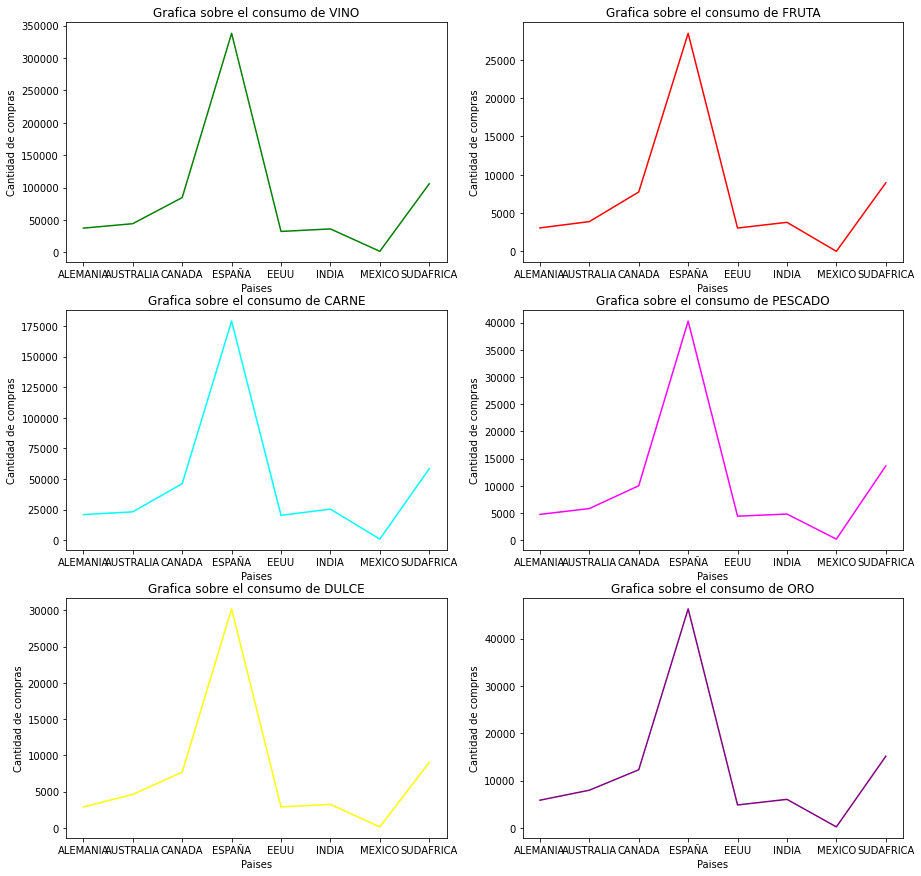

In [148]:
#Creamos 6 graficas que son las cantidades de productos que ofrece la tienda
fig = plt.figure(figsize=(15,15))
fig.tight_layout()
colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'purple', 'white']
product = ['VINO', 'FRUTA', 'CARNE', 'PESCADO', 'DULCE', 'ORO']

for i in range(1,7):
  x = ["ALEMANIA", "AUSTRALIA", "CANADA", "ESPAÑA", "EEUU", "INDIA", "MEXICO", "SUDAFRICA"]
  if i == 1:
    y = compra['Wine']
  elif i == 2:
    y = compra['Fruit']
  elif i == 3:
    y = compra['Meat']
  elif i == 4:
    y = compra['Fish']
  elif i == 5:
    y = compra['Sweet']
  elif i == 6:
    y = compra['Gold']
  ax = plt.subplot(3,2,i)
  ax.plot(x,y,color=colores[i])
  ax.set_xlabel('Paises')
  ax.set_ylabel('Cantidad de compras')
  ax.set_title('Grafica sobre el consumo de ' + str(product[i-1]))

Cuando analizamos las graficas, nos damos cuenta que son muy parecidas entre todas, pero no nos indican bien, que producto es el que más se vende, pero ya podemos determinar que el país que compra más los productos de la tienda es España

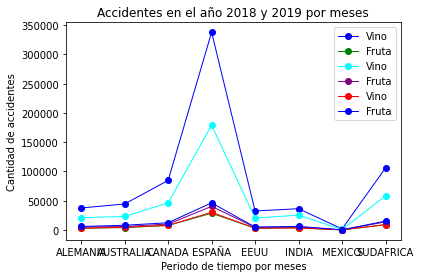

In [149]:
#Creamos la grafica
y = compra['Wine']
y2 = compra['Fruit']
y3 = compra['Meat']
y4 = compra['Fish']
y5 = compra['Sweet']
y6 = compra['Gold']
x = ["ALEMANIA", "AUSTRALIA", "CANADA", "ESPAÑA", "EEUU", "INDIA", "MEXICO", "SUDAFRICA"]
plt.plot(x,y,label='Vino', linewidth = 1, color='blue', marker = "o")
plt.plot(x,y2, label='Fruta',linewidth= 1, color='green', marker = "o")
plt.plot(x,y3,label='Vino', linewidth = 1, color='cyan', marker = "o")
plt.plot(x,y4, label='Fruta',linewidth= 1, color='purple', marker = "o")
plt.plot(x,y5,label='Vino', linewidth = 1, color='red', marker = "o")
plt.plot(x,y6, label='Fruta',linewidth= 1, color='blue', marker = "o")
plt.title("Accidentes en el año 2018 y 2019 por meses")
plt.ylabel("Cantidad de accidentes")
plt.xlabel("Periodo de tiempo por meses")
plt.legend()

Ya identificamos que el producto que más se vende en la tienda es el vino y que el país que más le compra productos es España

In [150]:
#Necesitamos agrupar los paises y sacar el número de compras
df_compras = data.groupby(['codigo', 'Code_country'])['TotalPurchases'].sum()
#Pasamos los datos a una lista
lista = [list(key) + [str(value)] for key, value in  df_compras.to_dict().items()]
#Pasamos los datos a un dataframe
df_compras = pd.DataFrame()
for x in lista:
  agregar = {}
  agregar = {"Pais" : x[0], "Codigo": x[1], "Total_compras": x[2]}
  df_compras = df_compras.append(agregar, ignore_index=True)
df_compras['Pais'] = df_compras['Pais'].replace({'1':'ESPAÑA', '2':'CANADA', '3':'ESTADOS UNIDOS', '4':'AUSTRALIA', '5':'ALEMANIA', '6':'INDIA', '7':'SUDAFRICA', '8':'MEXICO'})
df_compras

,Codigo,Pais,Total_compras
0,ESP,ESPAÑA,16052
1,CAN,CANADA,4101
2,USA,ESTADOS UNIDOS,1761
3,AUS,AUSTRALIA,2314
4,GER,ALEMANIA,1788
5,IND,INDIA,2099
6,ZAF,SUDAFRICA,5117
7,MEX,MEXICO,59


In [151]:
# Creacion del mapa
fig = px.choropleth(df_compras, locationmode='ISO-3', color ='Total_compras', hover_name="Pais",
                    locations='Codigo', projection='natural earth', title='Número total de compra por país'
                   )
fig.show()

Por la segmentación de los colores del mapa, podemos identificar cual es el pais que más compra (España) y cual es el que menos (Mexico)

# Parte 2: ¿Cual es la preferencia del cliente en las compras segun los datos?

Averiguar las preferencias de los clientes por diferentes situaciones del mismo como la edad, nivel educativo, estado civil, cantidad de Kids/Teens e ingresos recibidos, tambien averiguar las preferencias del cliente en los descuentos

*PREFERENCIAS DE LOS CLIENTES EN LAS COMPRAS SEGUN SU EDAD*

In [152]:
#Obtenemos el año actual en el cual estamos trabajando
date = dt.today()
year = date.strftime("%Y")
year = int(year)
year

2021

In [153]:
#Tenemos crear un nuevo campo en el DataFrame que nos de la edad, debido a que solos nos da los años de nacimiento de los clientes
data['edad'] = year - data['Year_Birth']
data['edad'].unique()

array([ 51,  60,  63,  54,  32,  67,  74,  42,  62,  40,  52,  44,  61,
        55,  45,  56,  65,  46,  50,  35,  49,  47,  31,  34,  37,  53,
        66,  38,  48,  43,  69,  59,  57,  39,  58,  64,  41,  76,  72,
        73,  68,  75,  36,  29,  77,  70,  33,  71,  27,  28,  30, 128,
        25,  26, 122,  78,  80,  81, 121])

In [173]:
#Como hay clientes que tienen una edad superior a 100, lo vamos a eliminar
data = data[data.edad<100]
data = data.reset_index(drop=True)
data['edad'].unique()

array([51, 60, 63, 54, 32, 67, 74, 42, 62, 40, 52, 44, 61, 55, 45, 56, 65,
       46, 50, 35, 49, 47, 31, 34, 37, 53, 66, 38, 48, 43, 69, 59, 57, 39,
       58, 64, 41, 76, 72, 73, 68, 75, 36, 29, 77, 70, 33, 71, 27, 28, 30,
       25, 26, 78, 80, 81])

In [167]:
  g=data.groupby(['edad'])['TotalPurchases'].count()

In [169]:
compra_edad = pd.DataFrame(g)

In [170]:
compra_edad.reset_index(level=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



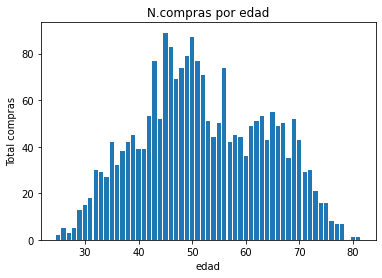

In [172]:
x_values = compra_edad['edad'].unique()
y_values = compra_edad['TotalPurchases']
plt.bar(x_values, y_values)
plt.title('N.compras por edad')
ax = plt.subplot() 
ax.set_xlabel('edad')  #Nombre del eje x
ax.set_ylabel('Total compras')  #Nombre del eje y
plt.show()
plt.close('all')

Hay más compras en la tienda en las edades de los rangos de 40 a 50 años

*PREFERENCIAS DE LOS CLIENTES EN LAS COMPRAS SEGUN SUS INGRESOS*

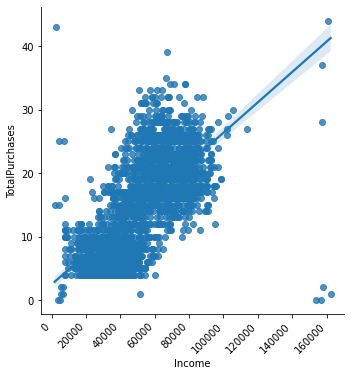

In [165]:
sns.lmplot(x='Income', y='TotalPurchases', data=data[data['Income']<200000]);
plt.xticks(rotation=45, horizontalalignment='right');

*PREFERENCIAS DE LOS CLIENTES EN LAS COMPRAS SEGUN LA CANTIDAD DE HIJOS*

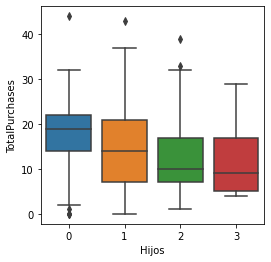

In [56]:
data['Hijos']=data['Kidhome']+data['Teenhome']
plt.figure(figsize=(4,4))
sns.boxplot(x='Hijos', y='TotalPurchases', data=data);

Los clientes que no tienen hijos, suelen ser los que más compras realizan en la tienda y los que tienen más hijos, son los que menos que compran. Por lo cual se puede afirmar que las compras depende de la cantidad de hijos que tenga el cliente

*PREFERENCIAS DE LOS CLIENTES EN LAS COMPRAS SEGUN NIVEL EDUCATIVO*

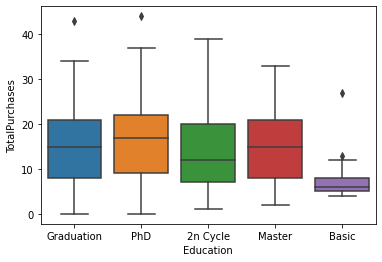

In [57]:
sns.boxplot(x='Education', y='TotalPurchases', data=data)

Las personas que están estudiando un doctorado (phD) son las personas que suelen gastar más en productos de la tienda y los que tiene un nivel educativo basico son los que menos

*PREFERENCIAS DE LOS CLIENTES EN LAS COMPRAS SEGUN EL ESTADO CIVIL*

In [58]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')
data.Marital_Status.value_counts()

Married     864
Together    579
Single      486
Divorced    231
Widow        77
Name: Marital_Status, dtype: int64

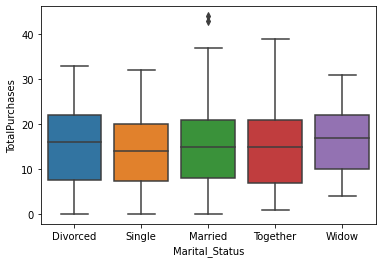

In [59]:
sns.boxplot(x='Marital_Status', y='TotalPurchases', data=data)

En el Estado Marital del cliente, no varia mucho el número de compras, pero se puede indicar que los divorciados son los que más compran

# Parte 3: ¿Cual campaña tuvo mayor acogida entre los clientes?

In [27]:
df_cam = data[['Code_country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Code_country', value_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Code_country', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

In [31]:
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                'Response': 'Most recent'
                                                })

In [39]:
fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=3,
                    facet_row_spacing=0.05, facet_col_spacing=0.01,
                    locations='Code_country', projection='natural earth', title='Exito de las diferentes campañas'
                   )
fig.show()

Viendo las diferentes campañas y las acogidas que tuvo en los diferentes paises, podemos indicar que no hubo gran acogida en muchas de las campañas, pero en la campaña 3, el país de Mexico acogio bien la campaña y la campaña más reciente, Mexico tambien tuvo una gran acogida, pero no es el unico país ya que vemos un incremento de acogemiento en los demás paises

# Parte 4: ¿Que porcentaje de clientes realizan compras por catalogo, via online y directamente con la tienda?

Se quiere verificar en que medio los clientes prefieren realizar sus compras con la tienda

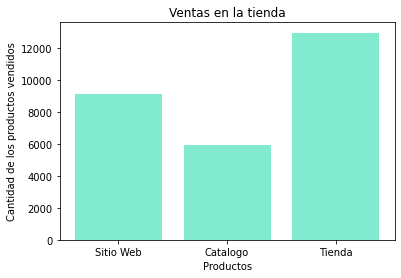

In [27]:
#Creamos la grafica de barras donde detectamos donde se compra más
#valores = valores[["productos", "cantidad"]]
x = ['Sitio Web', 'Catalogo', 'Tienda']
y = [data['NumWebPurchases'].sum(), data['NumCatalogPurchases'].sum(), data['NumStorePurchases'].sum()]
plt.bar(x, y, color = "#82eace")
plt.title("Ventas en la tienda")
plt.xlabel("Productos")
plt.ylabel("Cantidad de los productos vendidos")
plt.show()

Como podemos apreciar, en la tienda se presentan más ventas presenciales y debería reforzar más las ventas por medio del catalogo.

# Parte 5: ¿Cual es la recompra en relacion al ingreso?

In [28]:
#Punto de relacion de ingresos con recompra
data['Frecuencia_compra'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumDealsPurchases']

In [29]:
data = data[data['Income']<150000]#ingresos menores a 150.000
data = data.reset_index(drop=True)

In [30]:
data['Dependientes'] = data['Kidhome']+data['Teenhome']

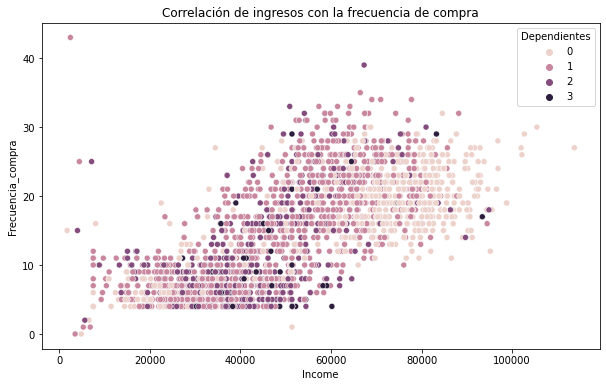

In [31]:
plt.figure(figsize=(10,6))#Relacion entre ingresos y la frecuencia de compra
sns.scatterplot(data=data, x='Income', y='Frecuencia_compra',hue='Dependientes')
plt.title("Correlación de ingresos con la frecuencia de compra")
plt.show()

Existe una correlación positiva entre los ingresos de los clientes y la frecuencia de compra.
La mayoría de los compradores de alta frecuencia no tienen más de dos hijos.
La mayoría de los clientes de altos ingresos (más de $ 80000) no tienen hijos

# Parte 6: ¿Cual es el lifetime value del cliente?

El valor de la vida del cliente es una métrica realmente importante para cualquier tipo de empresa. Resulta así tras conocer que adquirir nuevos clientes es mucho más caro que conservar a los existentes, por lo que ampliar el LTV ayuda a que los negocios sean mucho más sostenibles; además, los resultados favorecen la creación de nuevas y mejores estrategias de retención de clientes entre ellas campañas de marketing

Estos valores nos indican cuanto le retribuye respecto a la inversión de la empresa los clientes en un tiempo determinado,en este caso por mes.

In [40]:
#Creamos un nuevo dataframe con los valores necesarios para obtener el lifetime value del cliente
clv = pd.DataFrame()
clv['ID'] = data['ID']
clv['Dt_Customer'] = data['Dt_Customer']
clv['MntWines'] = data['MntWines']
clv['MntFruits'] = data['MntFruits']
clv['MntMeatProducts'] = data['MntMeatProducts']
clv['MntFishProducts'] = data['MntFishProducts']
clv['MntSweetProducts'] = data['MntSweetProducts']
clv['MntGoldProds'] = data['MntGoldProds']
clv

,ID,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1826,6/16/14,189,104,379,111,189,218
1,1,6/15/14,464,5,64,7,0,37
2,10476,5/13/14,134,11,59,15,2,30
3,1386,5/11/14,10,0,1,0,0,0
4,5371,4/8/14,6,16,24,11,0,34
...,...,...,...,...,...,...,...,...
2232,10142,3/7/13,372,18,126,47,48,78
2233,5263,1/22/13,5,10,13,3,8,16
2234,22,12/3/12,185,2,88,15,5,14
2235,528,11/29/12,267,38,701,149,165,63


In [41]:
#Sacamos el total de compras
purchases_col=[col for col in clv.columns if 'Mnt' in col]#variable para las columnas que contienen la palabra 'Purchase' sumar aplicado en forma de filas.
clv['Recompra']=clv[purchases_col].sum(axis=1)
clv

,ID,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recompra
0,1826,6/16/14,189,104,379,111,189,218,1190
1,1,6/15/14,464,5,64,7,0,37,577
2,10476,5/13/14,134,11,59,15,2,30,251
3,1386,5/11/14,10,0,1,0,0,0,11
4,5371,4/8/14,6,16,24,11,0,34,91
...,...,...,...,...,...,...,...,...,...
2232,10142,3/7/13,372,18,126,47,48,78,689
2233,5263,1/22/13,5,10,13,3,8,16,55
2234,22,12/3/12,185,2,88,15,5,14,309
2235,528,11/29/12,267,38,701,149,165,63,1383


In [42]:
#Creamos un diccionario con el valor de cada producto
productos = {'Wines': 10, 'Fruits': 2, 'Meats': 5, 'Fish': 4, 'Sweet': 3, 'Gold': 20}

In [43]:
#Cambiamos los campos que estan por unidad a precio del producto
clv['MntWines'] = clv['MntWines'] * int(productos['Wines'])
clv['MntFruits'] = clv['MntFruits'] * int(productos['Fruits'])
clv['MntMeatProducts'] = clv['MntMeatProducts'] * int(productos['Meats'])
clv['MntFishProducts'] = clv['MntFishProducts'] * int(productos['Fish'])
clv['MntSweetProducts'] = clv['MntSweetProducts'] * int(productos['Sweet'])
clv['MntGoldProds'] = clv['MntGoldProds'] * int(productos['Gold'])
clv

,ID,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recompra
0,1826,6/16/14,1890,208,1895,444,567,4360,1190
1,1,6/15/14,4640,10,320,28,0,740,577
2,10476,5/13/14,1340,22,295,60,6,600,251
3,1386,5/11/14,100,0,5,0,0,0,11
4,5371,4/8/14,60,32,120,44,0,680,91
...,...,...,...,...,...,...,...,...,...
2232,10142,3/7/13,3720,36,630,188,144,1560,689
2233,5263,1/22/13,50,20,65,12,24,320,55
2234,22,12/3/12,1850,4,440,60,15,280,309
2235,528,11/29/12,2670,76,3505,596,495,1260,1383


In [44]:
#Creamos el nuevo campo con la suma de todos los campos
clv['total_compra'] = clv['MntWines'] + clv['MntFruits'] + clv['MntMeatProducts'] + clv['MntFishProducts'] + clv['MntSweetProducts'] + clv['MntGoldProds']

In [45]:
clv['Dt_Customer']=pd.to_datetime(clv['Dt_Customer']) #variable que necesita una transformacion. Convertir de formato objet a tipo fecha.
clv['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2232   2013-03-07
2233   2013-01-22
2234   2012-12-03
2235   2012-11-29
2236   2012-09-01
Name: Dt_Customer, Length: 2237, dtype: datetime64[ns]

In [46]:
max_date = clv['Dt_Customer'].dt.date.max() #Encontramos la fecha maxima
min_date = clv['Dt_Customer'].dt.date.min() #Encontramos la fecha minima
total_cantidad = clv['Recompra'].sum() #Sumamos el total de los productos comprados
total_ventas = clv['total_compra'].sum() #Sumamos el valor de las ventas
 
print(f"El rango de fechas de las compras es de {min_date} a {max_date}")
print(f"Cantidad total de ventas: {total_cantidad} y total de ventas por periodo: {total_ventas}")

El rango de fechas de las compras es de 2012-07-30 a 2014-06-29
Cantidad total de ventas: 1355048 y total de ventas por periodo: 11269454


In [47]:
#Asignamos una columna con el nombre de fecha, donde nos va a indicar los dias que lleva en la tienda
clv['fecha']= pd.to_datetime(clv['Dt_Customer'], dayfirst=True,format = '%Y-%m-%d')
clv['fecha'] = pd.to_numeric(clv['fecha'].dt.date.apply(lambda x: (max_date - x)).dt.days, downcast='integer',errors="ignore")

In [49]:
#Creamos un nuevo DataFeame donde se evidencie los campos, del tiempo del cliente (en dias), las veces que compro y el total de las compras
cliente = pd.DataFrame()
cliente['Periodo_cliente'] = clv['fecha']
cliente['Frecuencia'] = clv['Recompra']
cliente['Ventas']= clv['total_compra']

In [50]:
#Sacamos los valores que necesitamos para obtener el VLC
promedio_ventas = round(np.mean(cliente['Ventas']), 2)
print(f"Promedio ventas: $ {promedio_ventas}")

frecuencia_compra = round(np.mean(cliente['Frecuencia']), 2)
print(f"Frecuencia compra: $ {frecuencia_compra}")

tasa_retencion = cliente[cliente['Frecuencia']>10].shape[0]/cliente.shape[0]
tasa_cancelacion = round(1-tasa_retencion, 2)
print(f"Tasa cancelación: $ {tasa_cancelacion} %")

Promedio ventas: $ 5037.75
Frecuencia compra: $ 605.74
Tasa cancelación: $ 0.01 %


In [51]:
margen_beneficio = 0.05
CLV = round(((promedio_ventas * frecuencia_compra / tasa_retencion)) * margen_beneficio, 2)
print(f"El valor de vida del cliente (CLV) para cada cliente es: $ {CLV}")

El valor de vida del cliente (CLV) para cada cliente es: $ 153539.24


In [52]:
cliente['Ventas'].describe()

count     2237.000000
mean      5037.753241
std       4858.565002
min         44.000000
25%        636.000000
50%       3453.000000
75%       8497.000000
max      21793.000000
Name: Ventas, dtype: float64

Se verificara que el valor CLV del cliente es un valor que tiene sentido

In [53]:
cliente['inicio_cliente'] = (pd.to_datetime(data['Dt_Customer'], errors="coerce").dt.month) #Este campo es el mes en el cual el cliente inicio

In [54]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']  

mensual_clv = []

for i in range(1, 13): 
  cliente_m = cliente[cliente['inicio_cliente'] == i]
  promedio_ventas = round(np.mean(cliente_m['Ventas']), 2)
  frecuencia_ventas = round(np.mean(cliente_m['Frecuencia']), 2)
  indice_retencion = cliente_m[cliente_m['Frecuencia'] > 15].shape[0]/cliente_m.shape[0] #Intentamos hayar el CLV con una frecuencia que fuera mayor a 1, pero nos daba 0.0 y generaba error
  tasa_cancelacion = round(1-indice_retencion, 2)
  CLV = round(((promedio_ventas * frecuencia_ventas / tasa_cancelacion)) * margen_beneficio, 2)
  mensual_clv.append(meses[i-1])
  mensual_clv.append(CLV)
mensual_clv

['Enero',
 7643680.04,
 'Febrero',
 16337211.56,
 'Marzo',
 12418957.11,
 'Abril',
 6496627.73,
 'Mayo',
 7213444.57,
 'Junio',
 2078630.4,
 'Julio',
 11228485.63,
 'Agosto',
 9210492.76,
 'Septiembre',
 9723369.84,
 'Octubre',
 16379896.3,
 'Noviembre',
 22272476.3,
 'Diciembre',
 6327529.58]

Ahora, si observa el resultado, tenemos 12 valores de CLV diferentes durante 12 meses desde enero hasta diciembre. Y los clientes que se adquieren en diferentes meses tienen diferentes valores CLV adjuntos. Esto se debe a que podrían adquirirse mediante diferentes campañas, etc., por lo que su comportamiento puede ser diferente al de los demás.

# Parte 7: ¿Cual es el nivel de sastifaccion del cliente con los productos que ofrece la tienda durante los dos ultimos años?

In [101]:
#Para saber que porcentaje de sastifaccion hay en los clientes, toca verificar la cantidad de quejas
sastifaccion = data['Complain'].count()
cantidad = data.groupby('Complain')['Complain'].count()
positivo = cantidad[0] * 100 / sastifaccion
negativo = cantidad[1] * 100 / sastifaccion

Text(0.5, 1.0, 'Sastifacción de los clientes')

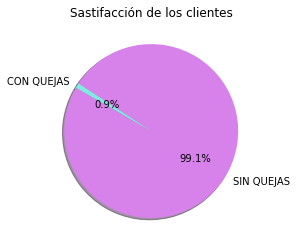

In [127]:
#Graficamos
val = [positivo, negativo]
labels = ['SIN QUEJAS', 'CON QUEJAS']
expl = [0, 0]
plt.pie(val, labels=labels, explode=expl, startangle=150, shadow=True, autopct='%1.1f%%', radius=1, colors=['#d682ea', '#82eae4'])
plt.title("Sastifacción de los clientes")

Esto nos indica que la tienda tiene sastifecho a sus clientes, ya que no se presentaron muchas quejas en los ultimos dos años.

***Integrantes del proyecto:***


*   Angela Liliam Benavides Suarez
*   Gabriela León González

